In [61]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
soil = pd.read_csv("Soil_Scaled.csv")
shannon = pd.read_csv("ShannonValues.csv")
soil.head()

,Soil_Sample,pH,Hematite,Ilmenite,Goethite,Magnetite,Quartz,Gibbsite,1:1 Clay,Maghemite,Carbonate Minerals,Plagioclase,NTM Culture
0,BLD 12-4,-1.086541,-1.528420,-0.264819,-0.646706,-0.871998,0.075902,1.211648,-1.212990,2.528203,-0.103767,2.137793,0
1,HNL 12-16,0.764842,0.153260,-0.139547,-0.676248,-0.807510,-1.100827,-0.754753,2.630977,-0.928498,-0.750282,-0.798337,0
2,HNL 12-17,-0.188565,-1.305835,-0.728223,1.244630,2.675385,-0.885284,-1.046987,0.385497,2.005741,-0.750282,-0.798337,0
3,HNL 12-18,-0.000101,1.513605,-0.351779,-0.973787,-0.019146,-0.832365,1.375356,1.141294,0.758071,-0.750282,-0.798337,0
4,HNL 12-19,-0.598752,0.140959,0.058581,-0.463719,1.124148,1.909957,2.472626,0.509450,-0.879448,-0.750282,-0.798337,0


In [63]:
shannon.head()

,Shannon,SampleName
0,5.680458,HNL 12-2
1,2.792966,HNL 12-4
2,5.697927,HNL 12-6
3,5.605441,HNL 12-22
4,4.201270,HNL 12-25


In [64]:
shannon2 = shannon.merge(soil, left_on="SampleName", right_on="Soil_Sample")
shannon2 = shannon2.set_index("SampleName")

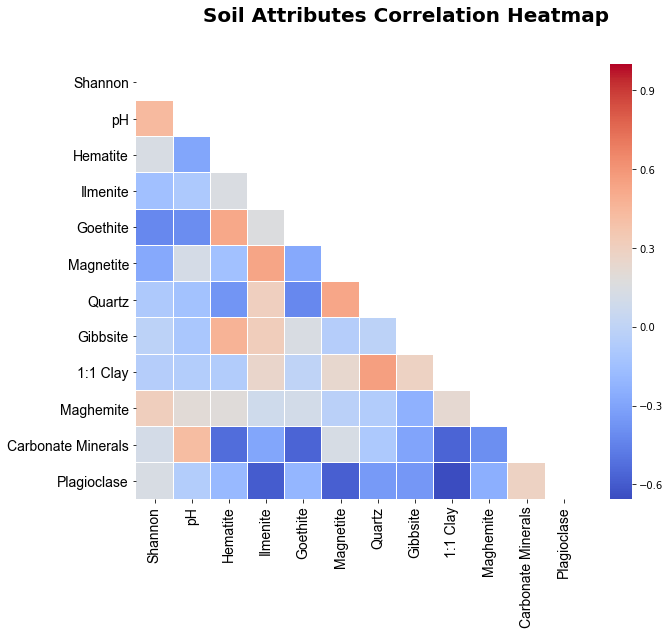

In [65]:
import seaborn as sns
import numpy as np
afont = {'fontname':'Arial'}
### Remove Empty Columns
Empty_Columns = ["NTM Culture"]
soil_scaled2 = shannon2.drop(Empty_Columns, 1)

corr_matrix = soil_scaled2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, (ax) = plt.subplots(1, 1, figsize=(10,8))
hm = sns.heatmap(corr_matrix,
                 mask=mask,
                 ax=ax, # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 square=False,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=False, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)
fig.suptitle('Soil Attributes Correlation Heatmap', 
              fontsize=20, 
              fontweight='bold')
plt.xlabel("")
plt.ylabel("")
plt.xticks(size=14, **afont)
plt.yticks(size=14, **afont)
#plt.savefig("FeatureCorrelation.png", transparent=True, bbox_inches='tight', dpi=300)
response = list(shannon2["Shannon"])
shannon2 = shannon2.drop(["Shannon", "Soil_Sample", "NTM Culture"], axis=1)

In [66]:
from scipy import stats
correlation_spearman = []
names2 = []
for z in range(0, 11):
    value = stats.spearmanr(np.array(shannon2[shannon2.columns[z]]), response)
    names2.append(shannon2.columns[z])
    correlation_spearman.append(value)


In [67]:
## Spearman
Correlation = []
P_Value = []
x = [Correlation.append(x.correlation) for x in correlation_spearman]
x = [P_Value.append(x.pvalue) for x in correlation_spearman]
df_sig = pd.DataFrame(names2)
df_sig.columns = ['Soil_Minerals']
df_sig.set_index('Soil_Minerals')
df_sig['Correlation'] = Correlation
df_sig['P_Value'] = P_Value
df_sig

,Soil_Minerals,Correlation,P_Value
0,pH,0.205472,0.413389
1,Hematite,0.042312,0.867607
2,Ilmenite,-0.044376,0.861206
3,Goethite,-0.618163,0.006252
4,Magnetite,-0.019608,0.938446
5,Quartz,0.048504,0.848430
6,Gibbsite,-0.252838,0.311413
7,1:1 Clay,0.017544,0.944915
8,Maghemite,0.277606,0.264710
9,Carbonate Minerals,-0.041919,0.868825


In [59]:
## Pearson
Correlation = []
P_Value = []
x = [Correlation.append(x[0]) for x in correlation_spearman]
x = [P_Value.append(x[1]) for x in correlation_spearman]
df_sig = pd.DataFrame(names2)
df_sig.columns = ['Soil_Minerals']
df_sig.set_index('Soil_Minerals')
df_sig['Correlation'] = Correlation
df_sig['P_Value'] = P_Value
df_sig

,Soil_Minerals,Correlation,P_Value
0,pH,0.431568,0.073728
1,Hematite,0.134940,0.593443
2,Ilmenite,-0.150367,0.551473
3,Goethite,-0.422789,0.080460
4,Magnetite,-0.270258,0.278083
5,Quartz,-0.082432,0.745049
6,Gibbsite,-0.011006,0.965427
7,1:1 Clay,-0.052917,0.834812
8,Maghemite,0.310379,0.210013
9,Carbonate Minerals,0.113062,0.655106
